# Naive Bayes Classifier - Text Classification - Gaussian

In this notebook we will learn how to apply the Naive Bayes algorithms for text classification. We will use a corpora of emails and classify them in one of the two classes: spam and non-spam (ham)

Naive Bayes methods are a set of supervised learning algorithms that use Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.


We investigate three different naive Bayes classifiers. These classifiers differ mainly by the assumptions they make regarding the distribution of the likelihhod of the features $p(x_j \mid y = c)$.

- Categorical features (binary valued) are modeled using the Multivariate Bernoulli distribution 
- Categorical features (multi-valued) are modeled using the Multinomial distribution 
- Real-valued features are modeled using the Gaussian distribution 

In this notebook we use the <strong> Gaussian NB </strong> classifier.



### Dataset

URL: https://archive.ics.uci.edu/ml/datasets/spambase



##### Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e., unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. Here are the definitions of the attributes: 

- 48 continuous real [0,100] attributes of type word_freq_WORD = percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

- 6 continuous real [0,100] attributes of type char_freq_CHAR] = percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

- 1 continuous real [1,...] attribute of type capital_run_length_average = average length of uninterrupted sequences of capital letters 

- 1 continuous integer [1,...] attribute of type capital_run_length_longest = length of longest uninterrupted sequence of capital letters 

- 1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail 

- 1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 




## Steps for Classification:

Note that the email data has already been preprocessd and features are extracted as vectors. Since the features are real-valued, we will use the Gaussian NB model.

1. Exploratory Data Analysis
2. Model Selection by Hyperparameter Tuning
3. Train the Optimal Model
4. Evaluate the Model on Test Data

In [1]:
import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

# Load Data

Load data from the CSV file as Pandas DataFrame object.

In [2]:
df = pd.read_csv('/Users/hasan/datasets/spambase.csv')

# <font color=blue> 1. Exploratory Data Analysis</font>

## Quick Check of the Data

Let’s take a look at the top five rows using the DataFrame’s head() method.

In [3]:
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
0         4600 non-null float64
0.64      4600 non-null float64
0.64.1    4600 non-null float64
0.1       4600 non-null float64
0.32      4600 non-null float64
0.2       4600 non-null float64
0.3       4600 non-null float64
0.4       4600 non-null float64
0.5       4600 non-null float64
0.6       4600 non-null float64
0.7       4600 non-null float64
0.64.2    4600 non-null float64
0.8       4600 non-null float64
0.9       4600 non-null float64
0.10      4600 non-null float64
0.32.1    4600 non-null float64
0.11      4600 non-null float64
1.29      4600 non-null float64
1.93      4600 non-null float64
0.12      4600 non-null float64
0.96      4600 non-null float64
0.13      4600 non-null float64
0.14      4600 non-null float64
0.15      4600 non-null float64
0.16      4600 non-null float64
0.17      4600 non-null float64
0.18      4600 non-null float64
0.19      4600 non-null float

In [5]:
print("Dimension of the data: ", df.shape)

no_of_rows = df.shape[0]
no_of_columns = df.shape[1]

print("No. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)

Dimension of the data:  (4600, 58)
No. of Rows: 4600
No. of Columns: 58


## Class Distribution

In [6]:
label_counts = df.iloc[:,-1].value_counts()
print(label_counts)

0    2788
1    1812
Name: 1, dtype: int64


## Visualization of the Class Distribution

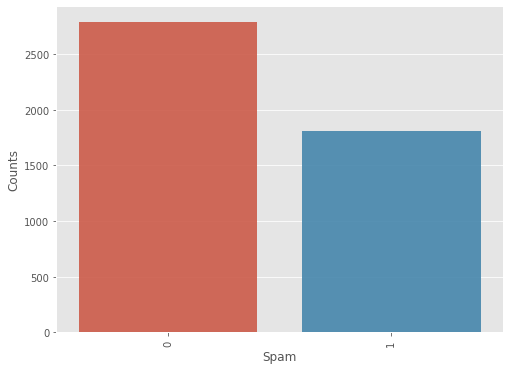

In [7]:
label_counts = df.iloc[:,-1].value_counts()
plt.figure(figsize = (8,6))
sns.barplot(label_counts.index, label_counts.values, alpha=0.9)

plt.xticks(rotation = 'vertical')
plt.xlabel('Spam', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

## Create a Separate Feature Set (Data Matrix X) and Target (1D Array y)

Create a data matrix (X) that contains all features and a 1D target vector (y) containing the target.

In [8]:
X = df.iloc[:,0:-1] # Data frame containing the target 
y = df.iloc[:,-1] # Data frame containing the features excluding the target

'''
Convert X & y into Arrays
Use the NumPy asarray() method to convert the Pandas data frame object X and y into numpy arrays.
'''

X = np.asarray(X) # Data Matrix containing all features excluding the target
y = np.asarray(y) # 1D target array

print("Data Matrix (X) Shape: ", X.shape)
print("Label Array (y) Shape: ", y.shape)

print("\nData Matrix (X) Type: ", X.dtype)
print("Label Array (y) Type: ", y.dtype)

Data Matrix (X) Shape:  (4600, 57)
Label Array (y) Shape:  (4600,)

Data Matrix (X) Type:  float64
Label Array (y) Type:  int64


## Create Train and Test Dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <font color=blue> 2. Model Selection </font>

In [10]:
%%time
warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'var_smoothing': [0.00000001, 0.00000001, 0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 1.0, 1.1, 2.0]}

gaussianNB_clf = GaussianNB()

gaussianNB_clf_cv = GridSearchCV(gaussianNB_clf, param_grid, scoring='f1', cv=5, verbose=3, n_jobs=-1)
gaussianNB_clf_cv.fit(X_train, y_train)


params_optimal_gaussianNB = gaussianNB_clf_cv.best_params_

print("Best Score: %f" % gaussianNB_clf_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_gaussianNB)
print("\n")

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Score: 0.803750
Optimal Hyperparameter Values:  {'var_smoothing': 1e-08}


CPU times: user 170 ms, sys: 115 ms, total: 285 ms
Wall time: 1.28 s


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  40 out of  55 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    1.3s finished


# <font color=blue> 3. Train the Optimal Model </font>

Using the optimal hyperparameter values, create the optimal model. Then, fit the model.

In [11]:
gaussianNB = GaussianNB(**params_optimal_gaussianNB)

gaussianNB.fit(X_train, y_train)  

GaussianNB(priors=None, var_smoothing=1e-08)

# <font color=blue> 4. Evaluate the Model on Test Data </font>

In [12]:
print("Test Accuracy: ", gaussianNB.score(X_test, y_test))

y_test_predicted = gaussianNB.predict(X_test)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted, target_names = ["Ham", "Spam"]))

Test Accuracy:  0.8097826086956522

Test Confusion Matrix:
[[374 156]
 [ 19 371]]

Classification Report:
              precision    recall  f1-score   support

         Ham       0.95      0.71      0.81       530
        Spam       0.70      0.95      0.81       390

    accuracy                           0.81       920
   macro avg       0.83      0.83      0.81       920
weighted avg       0.85      0.81      0.81       920



## <font color=maroon> Observation on Gaussian Model </font>

We observe that the recall for non-spam and precision for spam is small.